# Контрольная работа №1
## Дедлайн: 18.10.2024(пятница), 23:59
### Работа сдается в гугл-форму, которая будет закреплена в telegram конференции группы
### Работа при сдаче в гугл форму должна называться КР_Фамилия_Имя_Отчество.ipynb
#### Перед сдачей просьба не стирать вывод ячеек для того, чтобы преподаватель заново не запускал ваш код


## Задание №1
1. Загрузите датасет Salary.csv
2. Постройте гистограмму распредления зарплат и гистограмму распределения опыта работ, прокомментируйте полученный резульат
3. Постройте точечный график зависимости зарплаты от опыта работы, прокомментрируйте полученный результат
4. Отскалируйте данные зарплат при помощи MinMaxScaler
5. Инициализируйте модель, разделите выборку, обучите модель, померьте метрики (метрики на ваш выбор)
6. Постройте график линейной регресси на точечном графике зависимости зарплаты от опыта работы (легкая помощь, при использовании np.linspace лучше брать мин и макс по опыту работы, если вы отскалировали данные при помощи MinMaxScaler)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

###Задание *1.1.*

In [ ]:
data = pd.read_csv('Salary.csv')
#data.info()
#data.head()

###Задание *1.2.*

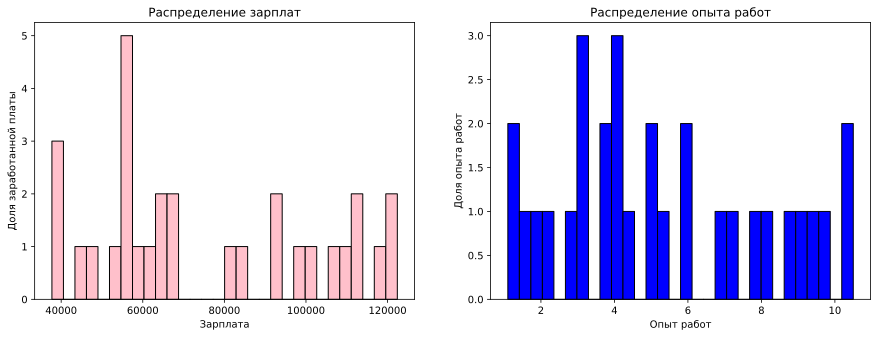

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 5
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=300)
axs[0].set_title("Распределение зарплат")
axs[0].hist(data['Salary'], bins = 30, color = 'pink', edgecolor = 'black')
axs[0].set_ylabel("Доля заработанной платы")
axs[0].set_xlabel("Зарплата")

axs[1].set_title("Распределение опыта работ")
axs[1].hist(data['YearsExperience'], bins = 30, color = 'blue', edgecolor = 'black')
axs[1].set_ylabel("Доля опыта работ")
axs[1].set_xlabel("Опыт работ")

plt.show()


В выборке представлено больше всего человек с зарплатой около 60.000, дальше по распространенности идет зарплата около 40.000.
Если посмотрим на распределение опыта работы, то у большинства человек, представленных в выборке, опыт работы составляет от 3 до 4,5 лет.


### Задание *1.3.*

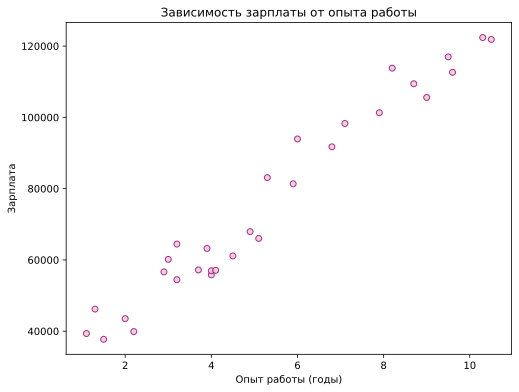

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['YearsExperience'], data['Salary'], color='pink', edgecolor='purple',  alpha=0.8)
plt.title('Зависимость зарплаты от опыта работы')
plt.xlabel('Опыт работы (годы)')
plt.ylabel('Зарплата')
plt.show()


В целом, можно наблюдать линейную зависимость, что больше опыт работы сотрудника, тем выше его зарплата.

###Задание *1.4.*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Scaled_Salary'] = scaler.fit_transform(data[['Salary']])
print(data.head())

   YearsExperience  Salary  Scaled_Salary
0              1.1   39343       0.019041
1              1.3   46205       0.100094
2              1.5   37731       0.000000
3              2.0   43525       0.068438
4              2.2   39891       0.025514


###Задание *1.5.*

In [ ]:
X = data[['YearsExperience']]
y = data[['Scaled_Salary']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', str(mse)+'\n', 'R-squared Error:', r2)


Mean Squared Error: 0.005271801128195492
 R-squared Error: 0.9414466227178214


Меньшее значение MSE означает, что модель лучше анализирует и воспринимает данные. Мы видим, что MSE близок к нулю, что говорит о том, что модель хорошо предсказывает результат.
Значение 0.9414 говорит о том, что примерно 94% вариации зависимой переменной объясняется независимыми переменными в модели.

###Задание *1.6.*

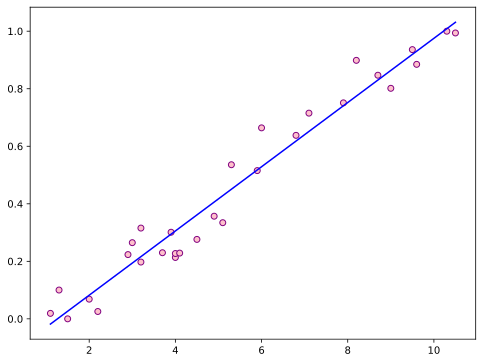

In [ ]:
X_train = data[['YearsExperience']]
y_train = data['Scaled_Salary']

model.fit(X_train,y_train)
w0,w1 = model.intercept_, model.coef_[0]
x_value = np.linspace(data['YearsExperience'].min(), data['YearsExperience'].max(), 100)

y_value = w0 + w1*x_value

plt.figure(figsize=(8, 6))
plt.scatter(data['YearsExperience'], data['Scaled_Salary'], color='pink', edgecolor = 'purple')
plt.plot(x_value, y_value, color='blue')


## Задание №2
1. Загрузите датасет Insurance.csv (Датасет в котором на основе возраста, пола, индекса массы тела, количеству детей, информации о курении человеком и регионе необходимо предсказать какую выплату по страховке он получит)
2. Проведите анализ датасета:
* постройте гистограмму возраста группы
* узнайте количество мужчин и женщин
* узнайте средний индекс массы тела
* узнайте количество курящих и не курящих
* узнайте у скольких людей есть дети
* узнайте сколько людей с каких регионов

* На данном основании сделайте выбор о сбалансированности набора данных

3. Найдите максимальну и минимальную выплату и сравните данных людей по всем средним показателям (вещественными показателями) группы. Прокоментируйте полученный результат.
4. Предобработайте данные для использования в модели (переведите категориальные признаки в вещественные)
5. Инициализируйте модель, разделите выборку, обучите модель,померьте метрики (метрики на ваш выбор), прокоментируйте полученный результат
6. Проведите отбор признаков и заново обучите модель, померьте метрики и сравните результат с предыдущими метриками, прокоментируйте результат

### Перед выполнение задания или пункта задания просьба в ячейке типа Markdown написать номер задания и пункт
#### P.S комментари в коде можно писать через #, но большие комментарии и комментарии по полученному результату, которые нужно написать по заданию, лучше писать в отедельной ячейки типа Markdown, нажав на ячейку вы можете поменять ее тип в верхнем меню.
### P.S.S У вас всё получится, удачи :)

###Задание *2.1.*

In [ ]:
df = pd.read_csv('Insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###Задание *2.2.*

#####Гистограмма возраста группы

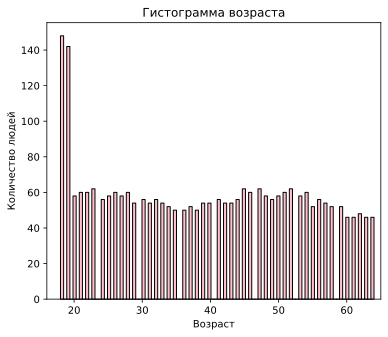

In [ ]:
plt.hist(df['age'], bins=100, color='pink', edgecolor = 'black')
plt.xlim((16, 65))
plt.title('Гистограмма возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.show()

#####Количество мужчин и женщин

In [ ]:
women_count = df['sex'].str.startswith('female').sum()
men_count = df['sex'].str.startswith('male').sum()
print('Количество женщин:', str(women_count)+'\n', 'Количество мужчин:', men_count)

Количество женщин: 1366
 Количество мужчин: 1406


#####Cредний индекс массы тела

In [ ]:
bmi_mean = df['bmi'].mean()
print('Cредний индекс массы тела:', bmi_mean)

Cредний индекс массы тела: 30.70134920634921


#####Kоличество курящих и не курящих

In [ ]:
smoke_count = df['smoker'].str.startswith('yes').sum()
nosmoke_count = df['smoker'].str.startswith('no').sum()
print('Kоличество курящих:', str(smoke_count)+'\n', 'Kоличество не курящих:', nosmoke_count)

Kоличество курящих: 564
 Kоличество не курящих: 2208


#####У скольких людей есть дети

In [ ]:
no_children = (df['children'] == 0).sum()
with_children = (df['children'] > 0).sum()
print('У скольких людей нет детей:', str(no_children)+'\n','У скольких людей есть дети:', with_children)

У скольких людей нет детей: 1186
 У скольких людей есть дети: 1586


####Cколько людей с каких регионов

In [ ]:
region_counts = df['region'].value_counts()
print('Cколько людей с какими:', region_counts)

Cколько людей с каких: region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64


*Выводы о сбалансированности*:
- Возраст группы: в среднем, мы видим, что выборка сблансирована, но есть преобладание людей возраста до 20 лет
- Количество мужчин и женщин почти одинаково (1406 мужчин и 1366 женщин и 1406 мужчин (разница меньше 1% от общего количеста людей)) => выборка по полу сбалансированная
- Наличие детей: Более половины людей в датасете имеют детей (1586), а 1186 людей не имеют детей. В целом, выборка более сбалансирована по этому параметру, чем по параметру 'курение' (см. дальше)
- Курение: Количество некурящих людей (2208) сильно больше, чем количество курящих людей (564) => по данному параметру выборка не сбалансирована
- Регионы: В среднем данные по регионам колеблются около 700 человек на один регион => можно сделать вывод, что данные распределены достаточно равномерно

*Общий вывод*: Датасет в целом выглядит относительно сбалансированным по многим параметрам, кроме параметра курения
Также стоит отметить, что не понятно, как оценивать равномерность выборки по параметру 'bmi', также, кажется, что этот параметр может не влиять на результат.

###Задание *2.3.*

In [ ]:
max_payment = df['charges'].max()
min_payment = df['charges'].min()

max_payment_data = df[df['charges'] == max_payment]
min_payment_data = df[df['charges'] == min_payment]
print(min_payment_data)
print(max_payment_data)

      age   sex    bmi  children smoker     region    charges
940    18  male  23.21         0     no  southeast  1121.8739
1373   18  male  23.21         0     no  southeast  1121.8739
2326   18  male  23.21         0     no  southeast  1121.8739
2759   18  male  23.21         0     no  southeast  1121.8739
      age     sex    bmi  children smoker     region      charges
543    54  female  47.41         0    yes  southeast  63770.42801
1929   54  female  47.41         0    yes  southeast  63770.42801


Мы видим, что у нас единственные данные, которые у нас пересекаеются от максимальной выплаты к минимальной - это 'region' и 'children' => можно сделать вывод, что эти параметры не влияют на объем вылпаты. Также зная, что выборка по параметру 'smoker' сильно не сбалансирована, можно не обращать на этот параметр в полученном результате.
Также, мне кажется, что параметр 'bmi' не влияет на выплаты, потому что можно с некоторым обобщением предположить, что индекс массы тела зависит от возраста, то есть это не два независимых параметра, а один зависит от другого.
Если смотреть на возраст, то можно заметить, что более молодым людят дают меньше выплату. Также, мы видим, что наибольшие выплаты получили женщины.

###Задание *2.4.*

In [ ]:
def categorize_gender(gender):
  if gender == 'male':
    return 1
  else:
    return 0


def categorize_smoker(smoke):
  if smoke == 'yes':
    return 1
  else:
    return 0


onehotencoder = OneHotEncoder(sparse_output = False)
df_onehot = df.copy()
encoded_df = pd.DataFrame(onehotencoder.fit_transform(df_onehot[['region']]))
onehotencoder.get_feature_names_out()
encoded_df.columns = onehotencoder.get_feature_names_out()
df_onehot = df_onehot.join(encoded_df)
df_onehot.drop('region', axis = 1, inplace = True)
df_onehot.head()
df_onehot['sex'] = df_onehot['sex'].apply(categorize_gender)
df_onehot['smoker'] = df_onehot['smoker'].apply(categorize_smoker)
df_onehot.head()


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


###Задание *2.5.*

In [ ]:
X = df_onehot.drop('charges', axis=1)
y = df_onehot['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', str(mse)+'\n', 'R-squared Error:', r2)


Mean Squared Error: 40004195.942378715
 R-squared Error: 0.7443308125692929


По ошибке mse видно, что обучение прошло очень плохо, потому что средняя квадратичная ошибка между предсказанными и фактическими значениями довольно велика
Если смотреть на r2 ошибку, то мы также видим, что в 25% были допущены ошибки.

###Задание *2.6.*

In [ ]:
df_last_2 = df_onehot.copy()
df_last_2 = df_last_2.drop('bmi', axis=1)
df_last_2 = df_last_2.drop('smoker', axis=1)
#df_last_1 = df_last_1.drop('region_northeast', axis=1)
#df_last_1 = df_last_1.drop('region_northwest', axis=1)
#df_last_1 = df_last_1.drop('region_southeast', axis=1)
#df_last_1 = df_last_1.drop('region_southwest', axis=1)
df_last_2 = df_last_2.drop('children', axis=1)
X = df_last_2.drop('charges', axis=1)
y = df_last_2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', str(mse)+'\n', 'R-squared Error:', r2)



Mean Squared Error: 139353192.25282985
 R-squared Error: 0.10938548845039997
